In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Uncomment the next two lines if running for the book
# import warnings
# warnings.filterwarnings("ignore")

import jax.random as jr
key = jr.key(0)

# Homework 5

## References

+ Module 4: High-dimensional uncertainty propagation
    - Functional inputs to scientific models
    - Operator learning

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name:** Seth
+ **Last Name:** Honnigford
+ **Email:** shonnigf@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):** Yes
+ **Which generative AI tool did you use (if applicable)?:** Colab

# Problem 1 - Proper Orthogonal Decomposition

Proper orthogonal decomposition (POD) is very closely related to the Karhunen-Loève expansion of a Gaussian random field.
The main difference is that POD is based on estimating the covariance function from a dataset of realizations of the random field, while the Karhunen-Loève expansion is based on the analytical form of the covariance function of the random field.
In this problem, I will guide you through the steps of deriving POD and highlight the connection to the Karhunen-Loève expansion.

Let $\Omega$ be a subset of $\mathbb{R}^d$ and let $L^2(\Omega)$ be the space of square-integrable functions on $\Omega$.
The inner product in $L^2(\Omega)$ is defined by:

$$
\langle u, v \rangle \equiv u^\dagger v \equiv \int_\Omega u(x) v(x) \, dx.
$$

The dagger notation $\dagger$ makes it easier to write the inner product in a compact form.

Suppose we have a dataset of $N$ functions $\{u_i\}_{i=1}^N \subset L^2(\Omega)$.
These are the realizations of the random field $u(x)$.

Define the empirical mean of any operator or functional $F[u]$ by:

$$
\langle F[u] \rangle = \frac{1}{N} \sum_{i=1}^N F[u_i].
$$

Suppose that we have shifted the functions $\{u_i\}_{i=1}^N$ so that their empirical mean is zero, i.e., $\langle u_i \rangle = 0$ for all $i$.

Define the empirical covariance operator $R: L^2(\Omega) \to L^2(\Omega)$ by:

$$
R\phi = \langle (\phi^\dagger u)u \rangle = \frac{1}{N} \sum_{i=1}^N (\phi^\dagger u_i)u_i.
$$

The POD *modes* are the eigenfunctions of the operator $R$:

$$
R\phi_k = \lambda_k \phi_k.
$$

In this problem, I am asking you to prove some properties of $R$ and the POD modes using just the following properties:

+ The inner produce $u^\dagger v = \langle u, v \rangle$ satisfies the properties of a standard inner product.
+ The empirical mean $\langle F[u] \rangle$ satisfies the basic properties of the expectation value of a random variable.
+ For any *linear* operator $F$, $\langle F[u] \rangle = F[\langle u \rangle]$.

## Part A

Show that the operator $R$ has the kernel representation:

$$
(R\phi)(x) = \int R(x,x') \phi(x') \, dx',
$$

where the kernel $R(x,x')$ is given by:

$$
R(x,x') = \langle u(x) u(x') \rangle.
$$

*Hint: Use the definition of $R$ and the properties of the inner product and the empirical mean.*

**Answer:**

We start by using the definition and expanding the inner product:

$$
R\phi = \langle (\phi^\dagger u)u \rangle = \frac{1}{N} \sum_{i=1}^N (\phi^\dagger u_i)u_i. ⇒ R\phi = \frac{1}{N} \sum_{i=1}^N (\int\phi(x')u_i(x')dx')u_i
$$

Rearrange the terms:

$$
R\phi = \int (\frac{1}{N} \sum_{i=1}^N u_i(x')u_i \phi(x') dx')
$$

Using the definition of the kernel:

$$
R\phi = \int \langle u(x) u(x')\rangle \phi(x')dx' = \int R(x,x') \phi(x') dx'
$$

Which can also be expressed as:

$$
R\phi(x) = \int R(x,x') \phi(x') dx'
$$

## Part B

Show that the operator $R$ is linear, i.e.,

$$
R(\alpha \phi + \beta \psi) = \alpha R\phi + \beta R\psi.
$$

**Answer:**

Using the definition:

$$
R(\alpha\phi + \beta\psi) = \langle((\alpha\phi + \beta\psi)^\dagger u)u\rangle
$$

Since the inner product is linear:

$$
\langle((\alpha\phi + \beta\psi)^\dagger u)u\rangle = \langle(\alpha(\phi^\dagger u) + \beta(\psi^\dagger u))u\rangle
$$

Since the emperical mean is also linear:

$$
R(\alpha\phi + \beta\psi)=\langle(\alpha(\phi^\dagger u) + \beta(\psi^\dagger u))u\rangle = \alpha\langle(\phi^\dagger u)u\rangle + \beta\langle(\psi^\dagger u)u\rangle
$$

Using the definition of R:

$$
R(\alpha\phi + \beta\psi) = \alpha\langle(\phi^\dagger u)u\rangle + \beta\langle(\psi^\dagger u)u\rangle = \alpha R\phi + \beta R\psi
$$

## Part C

Show that the operator $R$ is bounded, in the sense that

$$
\| R\phi \| \leq C \| \phi \|
$$

for some constant $C$ that does not depend on $\phi$.

*Hint: Use the triangle inequality for norms and the Cauchy-Schwarz inequality.*

**Answer:**

Using the definition of R and taking the norm:

$$
||R\phi|| = ||\frac{1}{N}\sum_{i=1}^N (\phi^\dagger u_i)u_i||
$$

Using the triangle inequality:

$$
||R\phi||\leq\frac{1}{N}\sum_{i=1}^N||(\phi^\dagger u_i)u_i||
$$

Using properties of the norm:

$$
||R\phi||\leq\frac{1}{N}\sum_{i=1}^N|\phi^\dagger u_i| ||u_i||
$$

Using the Cauchy-Schwarz inequality:

$$
||R\phi||\leq\frac{1}{N}\sum_{i=1}^N||\phi|| ||u_i||^2
$$

We can now factor out $||\phi||$:

$$
||R\phi||\leq||\phi||\frac{1}{N}\sum_{i=1}^N||u_i||^2
$$

Define C as:

$$
C=\frac{1}{N}\sum_{i=1}^N||u_i||^2
$$

Substituting for C:

$$
||R\phi||\leq C||\phi||
$$

## Part D

Show that $R$ is continuous.

*Hint: It sufficies to show that if $\|\phi_n - \phi\| \to 0$, then $\|R\phi_n - R\phi\|\to 0$. Use the fact that $R$ is bounded.*

**Answer:**

We start by assuming we have some sequence of function $\phi_n$ that conversges to $\phi$:

$$
||\phi_n-\phi|| → 0
$$

Since R is linear:

$$
||R\phi_n-R\phi|| = ||R(\phi_n-\phi)||
$$

Since we showed that R is bounded:

$$
||R(\phi_n-\phi)||\leq C||\phi_n-\phi||
$$

Since $\phi_n$ converges to $\phi$ we can also conclude:

$$
||R\phi_n - R\phi|| = ||R(\phi_n-\phi)|| → 0
$$

As $n → ∞$

## Part E

The adjoint of an operator $A$ is the operator $A^\dagger$ such that

$$
\langle A\phi, \psi \rangle = \langle \phi, A^\dagger \psi \rangle.
$$

It is easier to understand the adjoint using the dagger notation:

$$
(A\phi)^\dagger \psi = \phi^\dagger (A^\dagger \psi).
$$

That is, you can think of the adjoint as the transpose of a real matrix (or the conjugate transpose of a complex matrix).
Show that $R$ is self-adjoint when $R^\dagger = R$, i.e.,

$$
\langle R\phi, \psi \rangle = \langle \phi, R\psi \rangle,
$$

or equivalently in terms of the dagger notation:

$$
(R\phi)^\dagger \psi = \phi^\dagger (R\psi) = \phi^\dagger R\psi.
$$

So, you can think of the self-adjoint property as the analog of a real matrix being symmetric or a complex matrix being Hermitian.

*Hint: Just start with the left hand side, use the definition of $R$, the properties of the inner product and the empirical mean, and the fact that the inner product is a scalar.*

**Answer:**

We start by using the definition of R:

$$
(R\phi)^\dagger\psi = (\langle(\phi^\dagger u)u\rangle)^\dagger\psi = (\frac{1}{N}\sum_{i=1}^N(\phi^\dagger u_i)u_i)^\dagger\psi
$$

Distributing over the sum:

$$
(R\phi)^\dagger\psi = \frac{1}{N}\sum_{i=1}^N((\phi^\dagger u_i)u_i)^\dagger\psi
$$

Using the definition of the adjoint:

$$
(R\phi)^\dagger\psi = \frac{1}{N}\sum_{i=1}^N\phi^\dagger((\psi^\dagger u_i))u_i)
$$

Using the distributive property:

$$
(R\phi)^\dagger\psi = \phi^\dagger(\frac{1}{N}\sum_{i=1}^N(\psi^\dagger u_i)u_i)
$$

Using the definition of R:

$$
(R\phi)^\dagger\psi = \phi^\dagger(R\psi)
$$



## Part F

Show that $R$ is positive semi-definite, i.e.,

$$
\langle R\phi, \phi \rangle \geq 0,
$$

or equivalently in terms of the dagger notation:

$$
\phi^\dagger R\phi \geq 0.
$$

**Answer:**

Using the definition of R:

$$
\langle R\phi,\phi\rangle = \langle\frac{1}{N}\sum_{i=1}^N(\phi^\dagger u_i)u_i, \phi\rangle
$$

Since the inner product is linear:

$$
\langle R\phi,\phi\rangle = \frac{1}{N}\sum_{i=1}^N(\phi^\dagger u_i) \langle u_i,\phi\rangle = \frac{1}{N}\sum_{i=1}^N(\phi^\dagger u_i) (u_i^\dagger\phi)
$$

Since we are working with real-valued functions, $(\phi^\dagger u_i) = (u_i^\dagger\phi)^*=(u_i^\dagger\phi)$, which leaves us with:

$$
\langle R\phi,\phi\rangle = \frac{1}{N}\sum_{i=1}^N(\phi^\dagger u_i)^2
$$

Since the square of a real number is always non-negative, we can write:

$$
\langle R\phi,\phi\rangle = \frac{1}{N}\sum_{i=1}^N(\phi^\dagger u_i)^2 \geq 0
$$

## Part G

$R$ is also [compact](https://en.wikipedia.org/wiki/Compact_operator), but it is harder to show this property.
In any case, because $R$ is linear, bounded, self-adjoint, compact, and positive semi-definite, it has a complete set of orthonormal eigenfunctions $\{\phi_k\}_{k=1}^\infty$ and corresponding non-negative eigenvalues $\{\lambda_k\}_{k=1}^\infty$.

Show that we can represent $R$ using the spectral decomposition:

$$
R = \sum_{k=1}^\infty \lambda_k \phi_k \phi_k^\dagger.
$$

You can think of $\phi_k \phi_k^\dagger$ as the analog of a rank-one matrix.
It is defined in terms of its application to a function $\psi$ as:

$$
(\phi_k \phi_k^\dagger \psi)(x) = \phi_k(x) (\phi_k^\dagger\psi),
$$

since $\phi_k^\dagger\psi$ is a scalar.

*Hint: Take an arbitrary function $\psi$ and expand it in the basis of eigenfunctions $\{\phi_k\}_{k=1}^\infty$. Then show that applying $R$ to it gives the same result as applying the right-hand-side of the above expression.*

**Answer:**

We start by defining an arbitrary function $\psi$ and expanding it in the basis of eigenfunctions:

$$
\psi = \sum_{k=1}^\infty(\phi_k^\dagger\psi)\phi_k
$$

Applying R to $\psi$:

$$
R\psi = R(\sum_{k=1}^\infty(\phi_k^\dagger\psi)\phi_k)
$$

Since we showed that R was linear:

$$
R\psi = \sum_{k=1}^\infty (\phi_k^\dagger\psi) R\phi_k
$$

Since $\phi_k$ are eigenfunctions of $R$, that means $R\phi_k = \lambda_k\phi_k$, we can substitute this into our previous equation which results in:

$$
R\psi = \sum_{k=1}^\infty(\phi_k^\dagger\psi)\lambda_k\phi_k
$$

Rearranging the terms:

$$
R\psi = (\sum_{k=1}^\infty\lambda_k\phi_k\phi_k^\dagger) \psi
$$

This results in a spectral decomposition of R:

$$
R = \sum_{k=1}^\infty\lambda_k\phi_k\phi_k^\dagger
$$

## Part H

Show that the spectral decomposition of the kernel $R(x,x')$ is:

$$
R(x,x') = \sum_{k=1}^\infty \lambda_k \phi_k(x) \phi_k(x').
$$

**Answer:**

We start by applying the spectral decomposition to $R\phi(x)$:

$$
R\phi(x) = (\sum_{k=1}^\infty\lambda_k\phi_k(\int\phi_k(x')\phi(x')dx'))x
$$

We can then rearrange the terms to get:

$$
R\phi(x) = \int(\sum_{k=1}^\infty\lambda_k\phi_k(x)\phi_k(x'))\phi(x') dx'
$$

From part A, we know that $R\phi(x) = \int R(x,x')\phi(x')dx'$. Using this in conjunction with the previous step means:

$$
\int(\sum_{k=1}^\infty\lambda_k\phi_k(x)\phi_k(x'))\phi(x')dx'=\int R(x,x')\phi(x')dx'
$$

From observing this expression we can see that:

$$
R(x,x')=\sum_{k=1}^\infty\lambda_k\phi_k(x)\phi_k(x')
$$

## Part I

Okay, I hope you have identified the connection between the POD modes and the Karhunen-Loève expansion of a Gaussian random field.
This is is:

+ In POD, we use look at the eigenfunctions of the empirical covariance operator $R$, or equivalently the eigenfunctions of the kernel $R(x,x')$. We can estimate the eigenfunctions and eigenvalues of $R$ from a dataset of realizations of the random field.
+ In the Karhunen-Loève expansion, we use the eigenfunctions of the covariance function $k(x,x')$ of the random field. Someone gives us the analytical form of $k(x,x')$ and we can compute the eigenfunctions and eigenvalues of $k(x,x')$ analytically, e.g., using the Nyström method.

Now we are in a position to explain why we call the sum of the eigenvalues of $R$ (or equivalently the sum of the eigenvalues of $k(x,x')$) the *energy* of the random field.
Where is this coming from?

Suppose $u$ is one component of the velocity field of a fluid flow of constant density $\rho$.
The kinetic energy stored in this component of the fluid velocity is:

$$
K[u] = \frac{1}{2}\rho \int_\Omega u(x)^2 \, dx = \frac{1}{2}\|u\|^2.
$$

Show that the empirical mean of the kinetic energy is:

$$
\bar{K} = \langle K[u] \rangle = \frac{1}{2}\rho \sum_{i=1}^\infty \lambda_i.
$$

**Answer:**

We start by rewriting the emperical mean of the kinetic energy:

$$
\bar K = \langle K[u]\rangle = \frac{1}{N}\sum_{i=1}^N K[u_i]
$$

Using the definition of $K[u]$:

$$
\bar K = \frac{1}{N}\sum_{i=1}^N\frac{1}{2}\rho ||u_i||^2
$$

We can now take the inner product of $Ru_i$ with $u_i$:

$$
\langle Ru_i,u_i\rangle = \langle\frac{1}{N}\sum_{j=1}^N(u_i^\dagger u_j)u_j, u_i\rangle = \frac{1}{N}\sum_{j=1}^N(u_i^\dagger u_j)^2
$$

Since we are only considering real-valued functions, we can simplify this to:

$$
\langle Ru_i,u_i\rangle = \frac{1}{N}\sum_{j=1}^N(u_i^\dagger u_j)^2 = \frac{1}{N}||u_i||^2
$$

We can now substitute $\langle Ru_i,u_i\rangle$ into the emperical mean equation above:

$$
\bar K = \frac{1}{2}\rho\sum_{i=1}^N\langle Ru_i,u_i\rangle
$$

We can now use the spectral decomposition of $R$:

$$
\bar K = \frac{1}{2}\rho\sum_{i=1}^N\langle(\sum_{k=1}^\infty\lambda_k\phi_k\phi_k^\dagger)u_i,u_i\rangle = \frac{1}{2}\rho\sum_{i=1}^N\sum_{k=1}^\infty\lambda_k(\phi_k^\dagger u_i)^2
$$

Since the emperical mean is taken over all realizations of the random field, we are able to replace the sum over realizations with the sum over eigenvalues:

$$
\bar K = \frac{1}{2}\rho\sum_{i=1}^N\sum_{k=1}^\infty\lambda_k(\phi_k^\dagger u_i)^2 = \frac{1}{2}\rho\sum_{k=1}^\infty\lambda_k\sum_{i=1}^N(\phi_k^\dagger u_i)^2
$$

Since the eigenfunctions are orthonormal and complete, $\sum_{i=1}^N(\phi_k^\dagger u_i)^2 = 1$. Which means we can simplify our equation to:

$$
\bar K = \frac{1}{2}\rho\sum_{k=1}^\infty\lambda_k
$$

# Problem 2 - POD of fluid flow

Let's give POD, aka empirical Karhunen-Loève expansion, a try!

In this problem, we will apply POD on fluid flow.
We will use the 2D Navier-Stokes solution data set from Wang & Perdikaris (https://arxiv.org/abs/2203.07404).
The data contain the magnitude of a 2D fluid flow velocity field at different times.
You can see a video of it here:

<video width=" " height=" "
       src="https://user-images.githubusercontent.com/3844367/152894393-6fbc5e1e-f2b0-419e-aa74-3ecb17d0e23e.mp4"
       controls>
</video>

You can download the data using the following command:

In [2]:
!curl -O https://raw.githubusercontent.com/PredictiveIntelligenceLab/CausalPINNs/main/data/NS.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.6M  100 12.6M    0     0  12.6M      0  0:00:01  0:00:01 --:--:-- 12.6M


You can load the data like this:

In [3]:
import numpy as np

data = np.load('NS.npy', allow_pickle=True)

And you should work with the velocity magnitude:

In [4]:
vel_mag = data.item()['sol']
vel_mag.shape

(200, 128, 128)

You will also need the times at which the data were collected:

In [5]:
times = data.item()['t']

And the spatial grid:

In [6]:
x = data.item()['x']
y = data.item()['y']
X1, X2 = np.meshgrid(x, y)

## Part A - Singular value decomposition

Arrange all your data in a big matrix $\mathbf{X}$ such that each row is a snapshot of the velocity field.
That is, each row should be a flattened version of the velocity magnitude at a given time.
Then, compute the economy version of the singular value decomposition (SVD) of $\mathbf{X}$:

$$
\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T.
$$

*Hint: Use the function `scipy.linalg.svd`.*

**Answer:**

In [7]:
# Your code here

import numpy as np
from scipy.linalg import svd

# Reshape the velocity magnitude data into a matrix X
X = vel_mag.reshape(vel_mag.shape[0], -1)

# Compute the SVD
U, s, Vh = svd(X, full_matrices=False)  # Economy SVD

# Σ is a 1D array containing singular values; we need to convert it to a diagonal matrix
Σ = np.diag(s)

## Part B - Plot the percentage of energy captured by the POD modes

Plot the percentage of energy captured by the first $K$ POD modes, i.e.,
the percentage of energy captured by the first $K$ singular values, as a function of $K$.
That is, plot:

$$
\frac{\sum_{k=1}^K \sigma_k^2}{\sum_{k=1}^N \sigma_k^2} \times 100
$$

Use your plot to find the number of POD modes that capture 90% of the energy.

**Answer:**

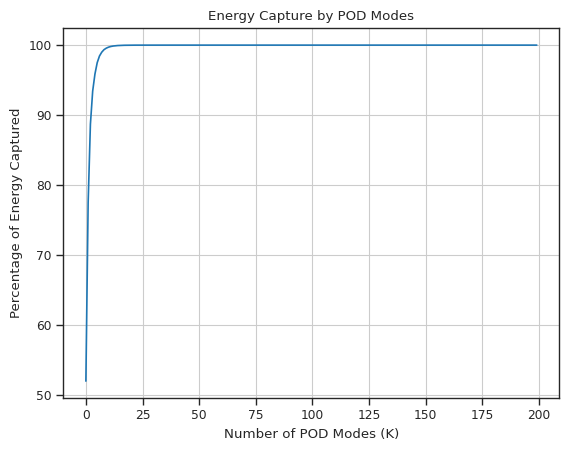

Number of POD modes to capture 90% of the energy: 4


In [8]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt

# Calculate the energy captured by the first K POD modes
energy_capture = np.cumsum(s**2) / np.sum(s**2) * 100

# Plot the energy capture as a function of K
plt.plot(energy_capture)
plt.xlabel('Number of POD Modes (K)')
plt.ylabel('Percentage of Energy Captured')
plt.title('Energy Capture by POD Modes')
plt.grid(True)
plt.show()

# Find the number of modes needed to capture 90% of the energy
K_90 = np.argmax(energy_capture >= 90) + 1
print(f'Number of POD modes to capture 90% of the energy: {K_90}')

Need 4 POD modes to capture 90% of the energy.

## Part C - Visualize the first two POD modes

Visualize the first two POD modes.
Recall, the POD modes are captured by the columns of the matrix $\mathbf{V}$.
So, you just need to take each of the first two columns of $\mathbf{V}$ and reshape them to the original spatial grid and do a contour plot.

**Answer:**

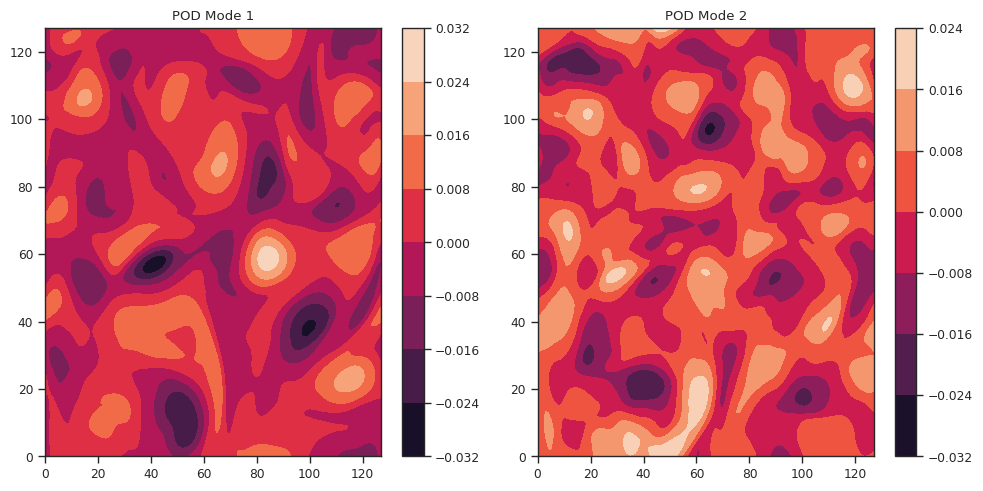

In [10]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt

# Calculate the appropriate shape for reshaping
mode_shape = (int(np.sqrt(Vh.shape[1])), int(np.sqrt(Vh.shape[1]))) # Assuming square shape for modes

# Extract the first two POD modes and reshape
mode1 = Vh[0, :].reshape(mode_shape)
mode2 = Vh[1, :].reshape(mode_shape)

# Create contour plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot mode 1
contour1 = axs[0].contourf(mode1) # Assuming X1 and X2 are not needed for contour plot
axs[0].set_title('POD Mode 1')
fig.colorbar(contour1, ax=axs[0])

# Plot mode 2
contour2 = axs[1].contourf(mode2) # Assuming X1 and X2 are not needed for contour plot
axs[1].set_title('POD Mode 2')
fig.colorbar(contour2, ax=axs[1])

plt.tight_layout()
plt.show()

## Part D - Principal components or modal coefficients

The principal components or modal coefficients are the projections of the data onto the POD modes.
Using the SVD, we have that the projections are:

$$
\mathbf{Z} = \mathbf{U}\boldsymbol{\Sigma}.
$$

Find that matrix and keep only the columns that correspond to 90% of the energy.

**Answer:**

In [11]:
# Your code here

import numpy as np

# Calculate the principal components
Z = U @ Σ  # Matrix multiplication using @ operator

# Calculate the energy captured by each singular value
energy_capture_singular_values = (s**2) / np.sum(s**2) * 100 # s is from part a

# Find the number of modes needed to capture 90% of the energy
cumulative_energy = np.cumsum(energy_capture_singular_values)
num_modes_90 = np.argmax(cumulative_energy >= 90) + 1

# Keep only the columns corresponding to 90% energy
Z_90 = Z[:, :num_modes_90]

## Part E - The modal coefficients are uncorrelated

Verify numerically that the modal coefficients are uncorrelated, i.e., that the empirical mean of the product of the modal coefficients is zero.

*Hint: You won't find exactly zero, but you should find a number that is very close to zero. You can get what you want by looking at the off diagonal of $\mathbf{Z}^T\mathbf{Z}$ and dividing by 200.*

**Answer:**

In [16]:
# Your code here

# Calculate the empirical mean of the product of modal coefficients
modal_coeff_products = Z_90.T @ Z_90

# Normalize by the number of snapshots
modal_coeff_products_normalized = modal_coeff_products / vel_mag.shape[0]

# Print the off-diagonal elements
print("Off-diagonal elements of normalized modal coefficient products:")
print(np.diag(modal_coeff_products_normalized, k=1))  # k=1 for the first off-diagonal
print(np.diag(modal_coeff_products_normalized, k=2))
print(np.diag(modal_coeff_products_normalized, k=3))

Off-diagonal elements of normalized modal coefficient products:
[-0.0291616   0.00486202 -0.00242199]
[0.01507039 0.0024954 ]
[0.00077638]


## Part F - Plot the time evolution of the first two modal coefficients

Plot the time evolution of the first two modal coefficients.

**Answer:**

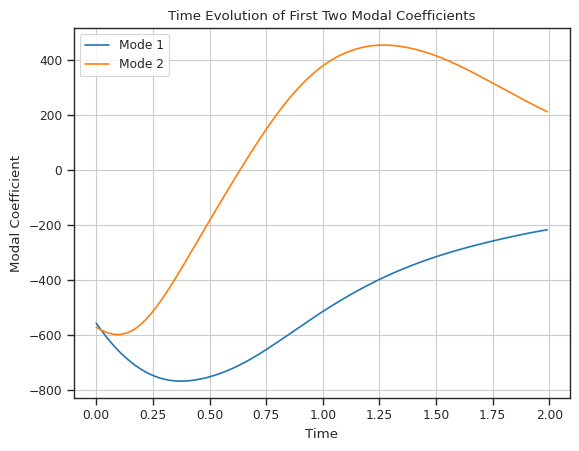

In [17]:
# Your code here

import matplotlib.pyplot as plt

# Extract the first two modal coefficients
modal_coeff_1 = Z_90[:, 0]  # First column
modal_coeff_2 = Z_90[:, 1]  # Second column

# Plot the time evolution
plt.plot(times, modal_coeff_1, label='Mode 1')
plt.plot(times, modal_coeff_2, label='Mode 2')
plt.xlabel('Time')
plt.ylabel('Modal Coefficient')
plt.title('Time Evolution of First Two Modal Coefficients')
plt.legend()
plt.grid(True)
plt.show()

## Part G - Reconstruction of the velocity magnitude

Reconstruct the velocity magnitude at times 0, 1, and 2, using the first $K$ POD modes (90\% of the energy).
Compare your reconstructions with the original data.

**Answer:**

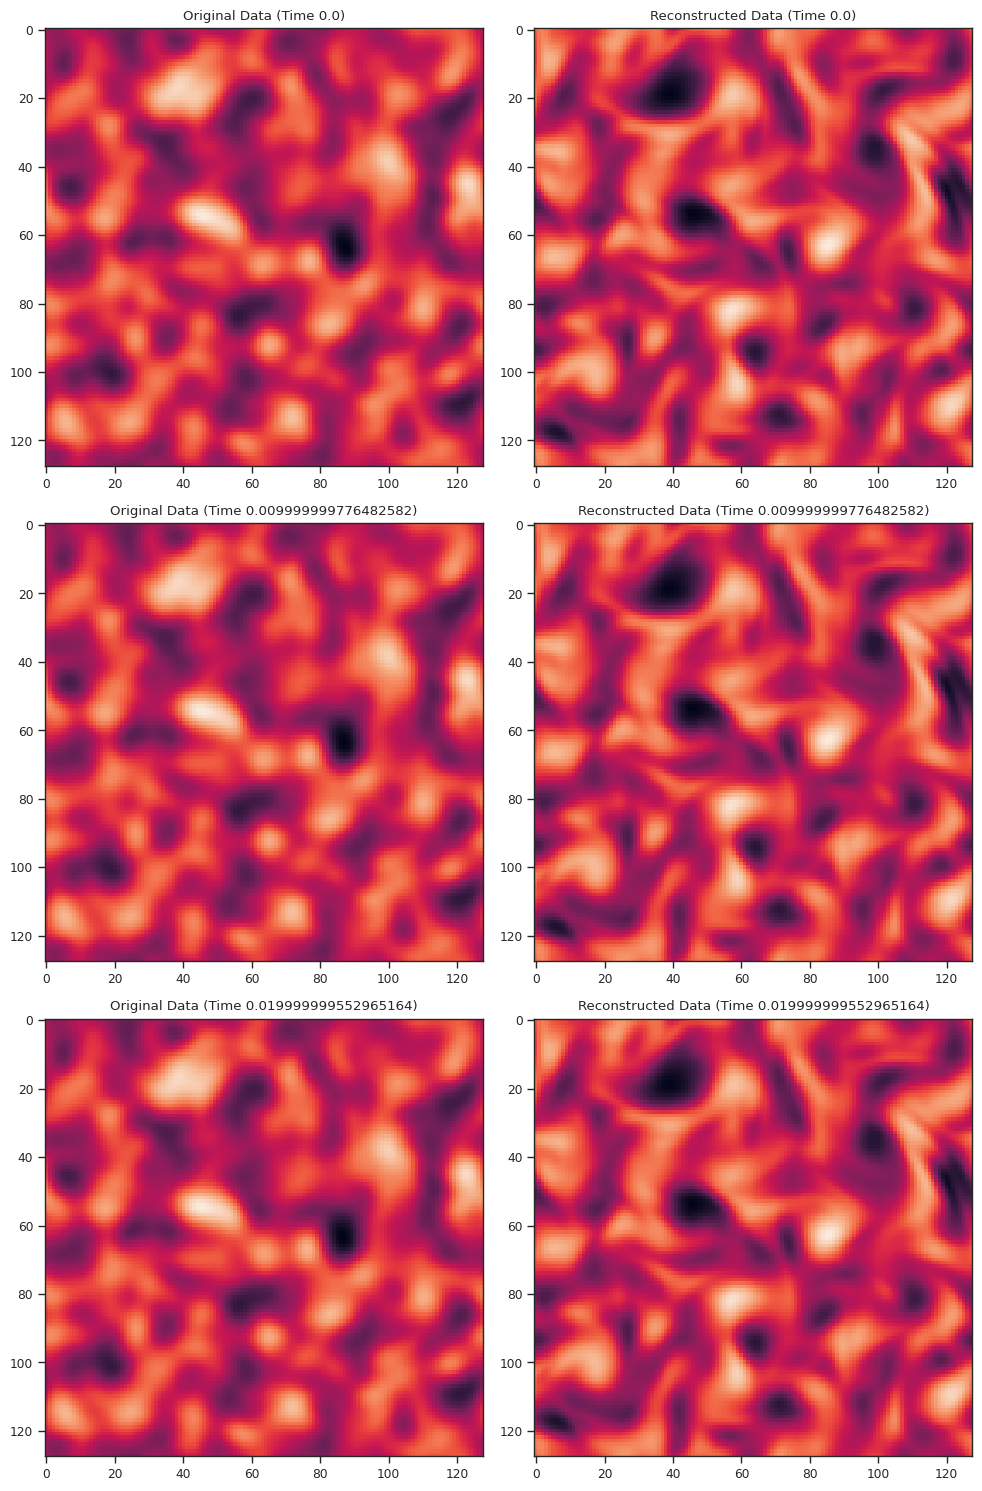

In [21]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt

# Number of POD modes to use (for 90% energy capture - calculated in Part B)
K = K_90

# Truncate SVD matrices to use only the first K modes
U_truncated = U[:, :K]
Σ_truncated = Σ[:K, :K]
Vh_truncated = Vh[:K, :]

# Reconstruct the velocity magnitude at times 0, 1, and 2
times_to_reconstruct = [0, 1, 2]
reconstructed_data = []

for time_index in times_to_reconstruct:
    # Get the principal components for the specific time
    principal_components_at_time = Z_90[time_index, :]

    # Perform the reconstruction
    reconstructed_snapshot = (U_truncated[time_index] @ np.diag(principal_components_at_time) @ Vh_truncated).reshape(vel_mag.shape[1], vel_mag.shape[2])
    reconstructed_data.append(reconstructed_snapshot)

# Compare with original data
fig, axs = plt.subplots(len(times_to_reconstruct), 2, figsize=(10, 15))

for i, time_index in enumerate(times_to_reconstruct):
    # Original data
    axs[i, 0].imshow(vel_mag[time_index, :, :])
    axs[i, 0].set_title(f'Original Data (Time {times[time_index]})')

    # Reconstructed data
    axs[i, 1].imshow(reconstructed_data[i])
    axs[i, 1].set_title(f'Reconstructed Data (Time {times[time_index]})')

plt.tight_layout()
plt.show()

# Problem 3 - Stochastic model for permeability of oil reservoir

In this problem, we will use the Karhunen-Loève expansion to model the permeability of an oil reservoir. Feel free to use the code provided in the hands-on activities to complete this problem.

The permeability of the soil is one of the largest unknowns in modeling underground flows. Here, you will create a 2D model of permeability that can be used for propagating uncertainties or as a starting point for model calibration. This is the information that is available to you:
+ You need to build a stochastic model for permeability with as low dimensionality as possible.
+ You need to be able to sample random permeability fields from this model.
+ The permeability is strictly positive.
+ The 2D domain you should consider is $[0, 356]\times[0,670]$ (in meters).
+ Our geologist gave us her best estimate about the permeability field. We have put the results for you in a data file and we show you how to load it and plot it below.
+ When asked how sure she is about the prediction, the geologist gave a standard deviation of about 3.2 on the logarithm of the permeability.
+ She also believes that there are two lengthscales: 50 meters and 10 meters.

Answer the following questions.

## Part A - Model the Permeability Field

Write down the mathematical form of the best stochastic model for the permeability you can come up with using the information above. Are you going to use a GP? Are you going to consider a transformed version of the GP? What would the mean be? What would the covariance function be? What would the parameters of the covariance function be?

**Answer:**

<br><br><br><br><br>

## Part B - Perform the Karhunen-Loève Expansion on the Prior

Construct the Karhunen-Loève expansion of the field using the code provided in the hands-on activities. You should: 1) use enough quadrature points so that you get a converged Nyström approximation; 2) use enough terms to cover $95\%$ of the fields energy; 3) Plot the eigenvalues of KLE; 4) Plot the first six eigenfunctions of KLE; 5) Plot six samples of the random field.

Here is the mean field provided by the geologist:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  193k  100  193k    0     0  1548k      0 --:--:-- --:--:-- --:--:-- 1559k


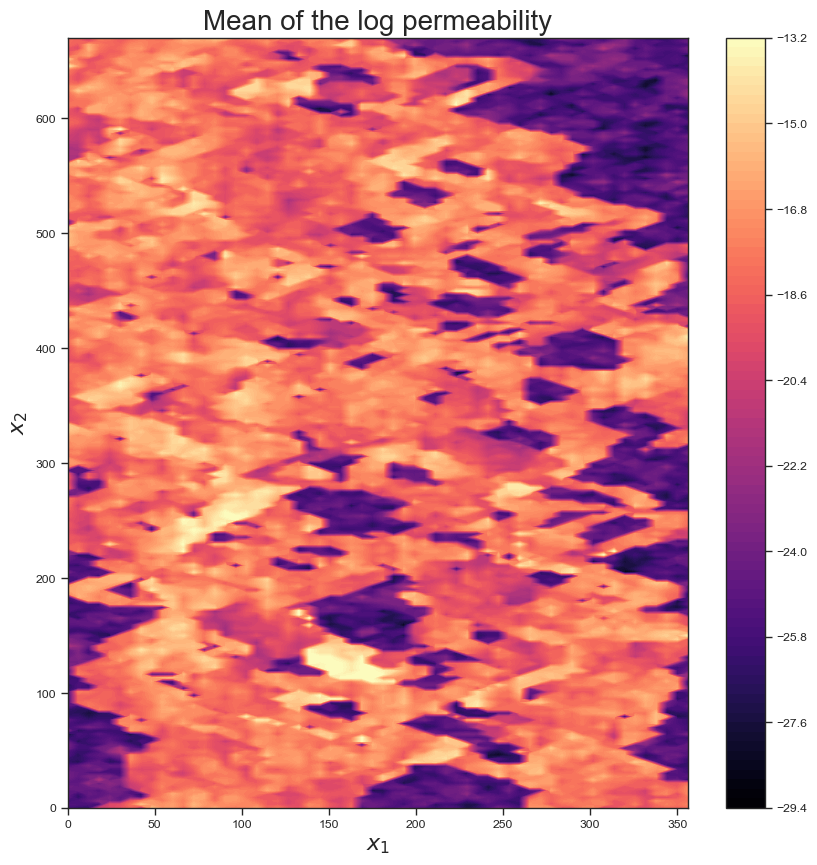

In [ ]:
# Download the data
!curl -O 'https://raw.githubusercontent.com/PredictiveScienceLab/uq-course/master/homeworks/spe10_permx.dat'

# Import the data
import pandas as pd
import numpy as np
M = pd.read_csv('spe10_permx.dat', delimiter=' ', header=None).loc[:, 1:].values.T

# Visualize the mean field
x1 = np.linspace(0, 356, 60)
x2 = np.linspace(0, 670, 220)
X1, X2 = np.meshgrid(x1, x2)
fig, ax = plt.subplots(1, figsize = (10, 10))
im=ax.contourf(X1, X2, np.log(M), 100, cmap = 'magma')
fig.colorbar(im, ax=ax)
ax.set_xlabel('$x_1$', fontsize = 16)
ax.set_ylabel('$x_2$', fontsize = 16)
ax.set_title('Mean of the log permeability', fontsize=20);

**Answer:**

<br><br><br><br><br>

## Part C - Condition the Prior on the Observations

You sent a crew to go and make some measurements of the permeability. Repeate everything you did in part B making use of the new data:


|$x_1$ |$x_2$ | $\log K(x_1, x_2)$ |
|------|------|--------------------|
|100.  |200.  | -13.2              |
|300.  |500.  | -25.3              |

Hint: You will have to condition your prior probability measure on the observations and work with the posterior mean and posterior covariance function.

**Answer:**
<br><br><br><br><br>

# Problem 4: Operator learning for Darcy flow

Darcy flow refers to the flow of a fluid through a porous medium under a pressure gradient.
For some physical domain $\Omega$, the governing equation can be written as:

$$
\nabla \cdot \left( K \nabla p \right) = f,
$$

where $K: \Omega \to \mathbb{R}_+$ is the permeability field and $p: \Omega \to \mathbb{R}_+$ is the pressure field.
For a known boundary condition and source term $f$ , we want to learn the operator $K \mapsto p$.


## Part A - Train a Fourier Neural Operator

We will use simulation data from the [examples in the `neuraloperator` library documentation](https://neuraloperator.github.io/dev/auto_examples/index.html).
Let's say the simulation inputs $x$ are related to the permeability $K$ at all spatial locations $r \in \Omega$ by

$$
K(r) = \begin{cases} k_1 & \text{if } x(r) = 0 \\ k_2 & \text{if } x(r) = 1 \end{cases}
$$

for some $k_0$ and $k_1$. Also, suppose the simulation output $y$ is related to the pressure $p$ by

$$
y(r) = p(r) - p_0
$$

for some $p_0$. From here on out, we can just work with $x$ and $y$.

Okay, let's import the data:

In [ ]:
!pip install -q neuraloperator

import urllib.request
import os
from neuralop.data.datasets import load_darcy_flow_small

def download(
    url : str,
    local_filename : str = None
):
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

base_url = 'https://www.github.com/neuraloperator/neuraloperator/raw/refs/heads/main/neuralop/data/datasets/data/'
download(os.path.join(base_url, 'darcy_test_32.pt'))
download(os.path.join(base_url, 'darcy_test_16.pt'))
download(os.path.join(base_url, 'darcy_train_16.pt'))

train_loader, test_loaders, data_processor = load_darcy_flow_small(
        n_train=1000, batch_size=32,
        test_resolutions=[16, 32], n_tests=[100, 50],
        test_batch_sizes=[32, 32],
        data_root='./',
)

device = 'cpu'
data_processor = data_processor.to(device)

Loading test db for resolution 16 with 100 samples 
Loading test db for resolution 32 with 50 samples 


We have created dataloaders for 3 different datasets:
- a low-resolution (16x16) training set
- a low-resolution test set
- a higher-resolution (32x32) test set

Let's extract the data arrays:

In [ ]:
# Code modified from https://neuraloperator.github.io/dev/auto_examples/models/plot_FNO_darcy.html#sphx-glr-auto-examples-models-plot-fno-darcy-py

# Training data
train_samples = train_loader.dataset
train_x = data_processor.preprocess(train_samples[:], batched=False)['x']
train_y = data_processor.preprocess(train_samples[:], batched=False)['y']

# Low-resolution test data
test_samples_16 = test_loaders[16].dataset
test_x_16 = data_processor.preprocess(test_samples_16[:], batched=False)['x']
test_y_16 = data_processor.preprocess(test_samples_16[:], batched=False)['y']

# High-resolution test data
test_samples_32 = test_loaders[32].dataset
test_x_32 = data_processor.preprocess(test_samples_32[:], batched=False)['x']
test_y_32 = data_processor.preprocess(test_samples_32[:], batched=False)['y']

And let's plot a few samples from the training data:

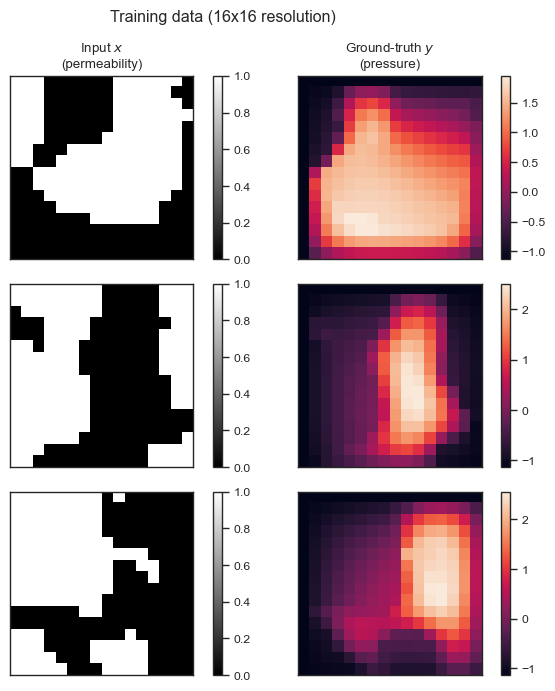

In [ ]:
fig = plt.figure(figsize=(7, 7), tight_layout=True)
for index in range(3):
    x = train_x[index]
    y = train_y[index]

    ax = fig.add_subplot(3, 2, index*2 + 1)
    p = ax.imshow(x[0], cmap='gray')
    if index == 0:
        ax.set_title('Input $x$\n(permeability)')
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    fig.colorbar(p, ax=ax)

    ax = fig.add_subplot(3, 2, index*2 + 2)
    p = ax.imshow(y.squeeze())
    if index == 0:
        ax.set_title('Ground-truth $y$\n(pressure)')
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    fig.colorbar(p, ax=ax)

fig.suptitle('Training data (16x16 resolution)');

**Now, do the following:**
- Train a Fourier Neural Operator (FNO) to approximate the Darcy flow operator $x \mapsto y$ using the training data. You may either use the PyTorch library `neuraloperator` or implement your own FNO in JAX.
- Plot the convergence of the L2 error on the train and test sets as a function of training iterations.
- Plot the ground truth vs. the model prediction for a few samples from each test sets.

Note: You may reuse external code as a starting point (like the example notebooks in the `neuraloperator` documentation). If you do, be sure to state so!

**Answer:**
<br><br><br><br><br>

## Part B - Propagate uncertainty through the Darcy flow operator

Suppose you have a noisy measurement of the permeability field $x$ on a 24x24 grid:

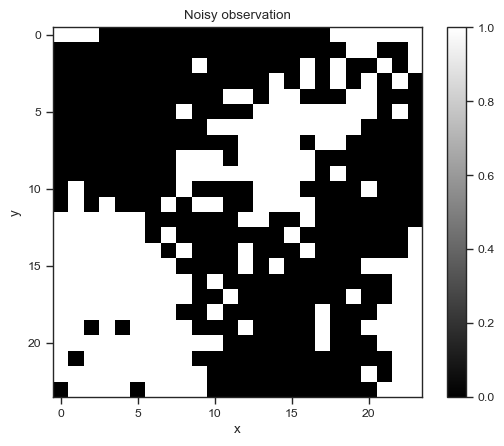

In [ ]:
import numpy as np

# Import the noisy observation
download('https://raw.githubusercontent.com/PredictiveScienceLab/advanced-scientific-machine-learning/refs/heads/main/book/data/darcy_flow/obs_24x24.npy')
obs = np.load('obs_24x24.npy')

fig, ax = plt.subplots()
p = ax.imshow(obs, cmap='gray')
fig.colorbar(p, ax=ax)
ax.set_title('Noisy observation')
ax.set_xlabel('x')
ax.set_ylabel('y');

We expect the true permeability field to be smoother than this.
So let's create a Gaussian process and condition it on the observation.

(Note that we're handpicking the lengthscale to reflect how smooth we expect $x$ to be. We are also fixing the noise level.)

In [ ]:
from jax import vmap
import jax.random as jr
import jax.numpy as jnp
import numpy as np
from tinygp import GaussianProcess, kernels

res = (24, 24)

# Transform the observation so that each pixel is either positive or negative.
obs_transformed = np.where(obs == 1.0, 0.5, -0.5)

# Create the grid
X = np.stack(np.meshgrid(np.linspace(0, 1, res[0]), np.linspace(0, 1, res[1])), axis=-1).reshape(-1, 2)

# Create the Gaussian process
k = kernels.ExpSquared(scale=0.2)  # Handpick the lengthscale
gp = GaussianProcess(k, X, diag=0.5)

# Condition the Gaussian process on the observation
_, cond_gp = gp.condition(obs_transformed.flatten())

# Sample from the conditioned Gaussian process
def sample_x(key):
    # Sample
    z = cond_gp.sample(key)

    # Transform to {0, 1} space
    return jnp.where(z > 0.0, 1.0, 0.0).reshape(res)

Okay, we now have a way to sample permeability fields (evaluated on the 24x24 grid).
Here is how to take a sample:

In [ ]:
sample_x(key)

Array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 

Let's plot a few samples of the smoothed permeability field:

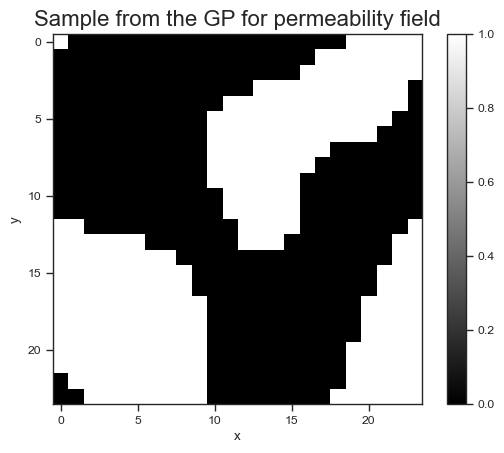

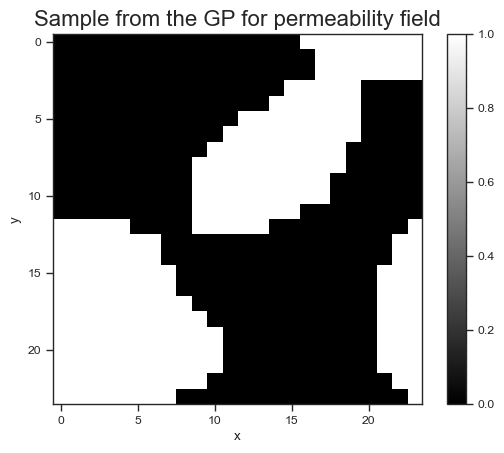

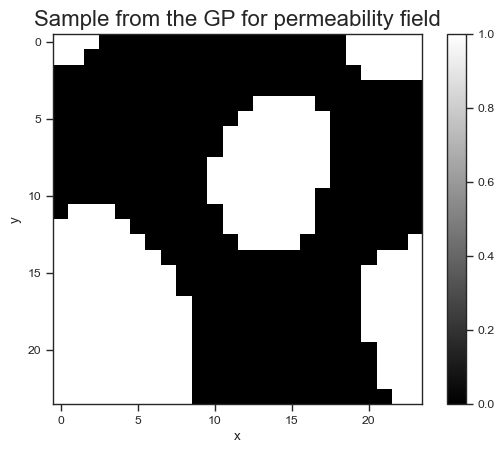

In [ ]:
# Collect samples
N = 3
key, subkey = jr.split(key)
keys = jr.split(subkey, N)
samples = vmap(sample_x)(keys)

# Plot
for i in range(N):
    fig, ax = plt.subplots()
    p = ax.imshow(samples[i], cmap='gray')
    fig.colorbar(p, ax=ax)
    ax.set_title('Sample from the GP for permeability field', fontsize=16)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

Okay, we have now implemented a random field that captures our uncertainty about the permeability field $x$.
Let's propagate this uncertainty through the Darcy flow operator you learned in part A.
Do the following:
- Generate 1,000 samples of permeability fields (using the function `sample_x`).
- Evaluate your trained FNO on each of these samples to get 1,000 predicted pressure fields.
- Visualize:
    1. Plot a few samples of the pressure fields.
    2. Make a histogram of the following quantities:
        - The mean predicted pressure (over all pixels), i.e.,

        $$
        \text{mean}[p] = \int_\Omega p(r) dr \approx \frac{1}{24 \times 24} \sum_{i,j} p_{i,j}
        $$

        - The maximum predicted pressure (over all pixels), i.e.,

        $$
        \text{max}[p] \approx \text{max}\big(\{p_{i,j}\}_{i,j \in \{1\dots 24\}}\big)
        $$
        
    3. Plot the mean and variance of the pressure field (on the 24x24 grid).
    4. For each of the 1,000 samples, determine which pixel had the maximum pressure. Then create a heatmap where each pixel's intensity corresponds to the number of times that pixel had the maximum pressure.

**Answer**
<br><br><br><br><br>